# FETAL HEALTH PREDICTION

# Import Necessary Libraries and Data Sets

In [34]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from joblib import dump

# Encryption
import pandas as pd
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from base64 import b64encode, b64decode
import os

In [35]:
# Load Dataset
data = pd.read_csv('C:/Users/dell/Documents/Varshaa SEM 8/Data Privacy & Security Lab/CAT 1 - Project/fetal_health.csv')

In [36]:
# ENCRYPTION

def BytesToInt(b):
    return int.from_bytes(b, byteorder='big')

# Load dataset
data = pd.read_csv('C:/Users/dell/Documents/Varshaa SEM 8/Data Privacy & Security Lab/CAT 1 - Project/fetal_health.csv')

# Choose a column to encrypt (replace 'column_to_encrypt' with the actual column name)
column_to_encrypt = 'fetal_movement'

# Generate a random 256-bit key
key = os.urandom(32)

# Create a cipher object using AES in CBC mode with a random IV
cipher = Cipher(algorithms.AES(key), modes.CFB(os.urandom(16)), backend=default_backend())

# Convert the column to bytes and pad it to be a multiple of 16 bytes (AES block size)
data[column_to_encrypt] = data[column_to_encrypt].astype(str).apply(lambda x: x.encode('utf-8').ljust(16 * ((len(x) // 16) + 1)))

# Encrypt each value in the column
data[column_to_encrypt] = data[column_to_encrypt].apply(lambda x: BytesToInt(cipher.encryptor().update(x)))

# Save the key for future decryption
with open('encryption_key.txt', 'wb') as key_file:
    key_file.write(key)


# Exploratory Data Analysis (EDA) and Analysis

In [37]:
# Print the first 5 rows of the dataframe.
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,24047873261324123628361627948103498481,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,24047873261324123628361627948103498481,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,24047873261324123628361627948103498481,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,24047873261324123628361627948103498481,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,24047873261324123628361627948103498481,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [38]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [39]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000
mean_value_of_long_term_variability,2126.0,8.187629,5.628247,0.0,4.600,7.400,10.800,50.700


In [40]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   object 
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [41]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


# Count the missing and null values

In [42]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


# Visualize missing values (NaN) using Missingno Library:

# Bar Chart 

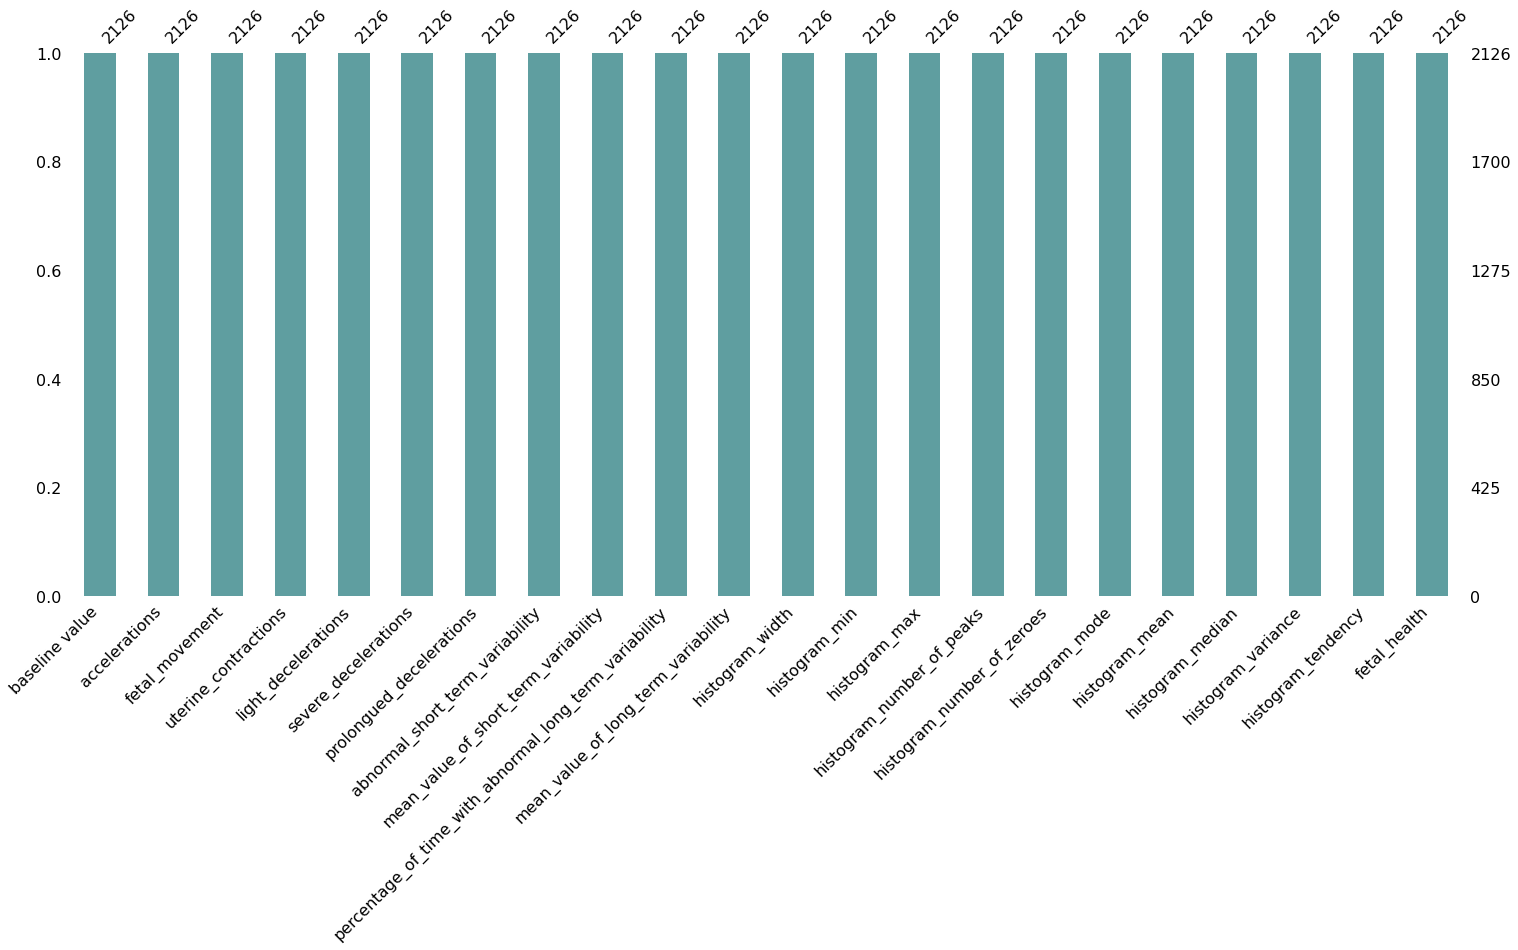

In [43]:
# Null count analysis
null_plot = msno.bar(data, color = "#5F9EA0")

# Analyze and visualize the target column (fetal_health)

In [44]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


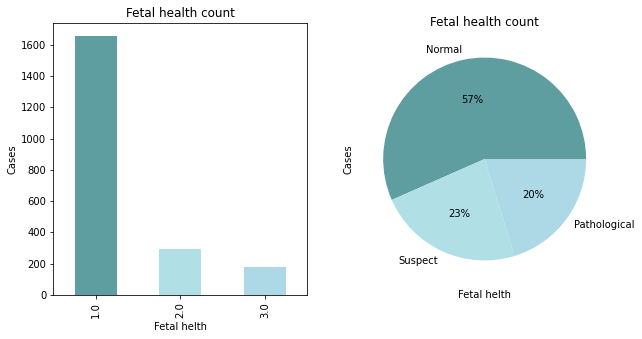

In [45]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")
plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.show()

In [1]:
# # Set the figure size
# plt.figure(figsize=(8, 4 * len(data.columns)))

# # Iterate through each column and plot a histogram
# for i, column in enumerate(data.columns, start=1):
#     plt.subplot(len(data.columns), 1, i)
#     data[column].hist(color="#5F9EA0")
#     plt.title(column)
#     plt.xlabel("Values")
#     plt.ylabel("Frequency")

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()

# Correlation Numeric featurs with output variable(fetal_health)

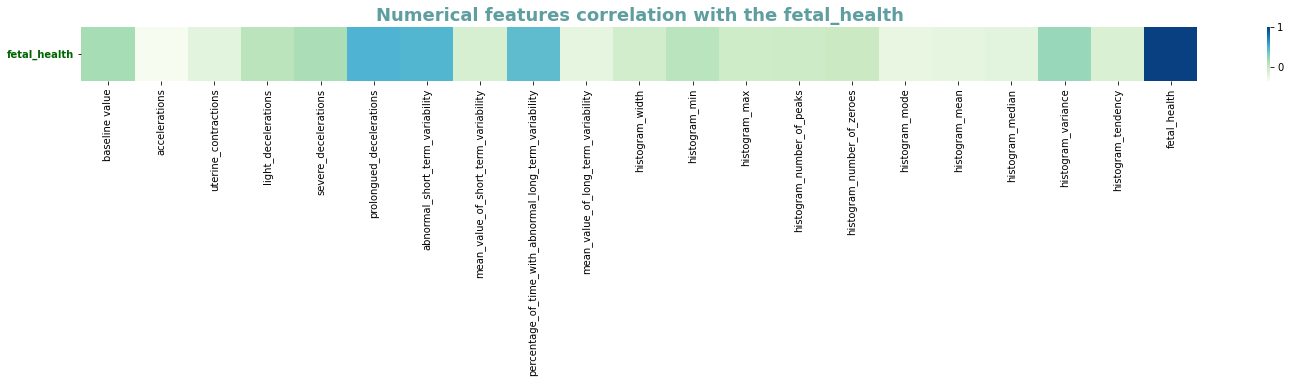

In [47]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [48]:
# # Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

# # cm = sns.light_palette("#5F9EA0", as_cmap=True)

# # style = Num_feature.style.background_gradient(cmap=cm)
# # style
import plotly.express as px

# Get the top 20 numeric features correlated with "fetal_health"
num_feature = data["fetal_health"].sort_values(ascending=False).head(20).to_frame()

# Create a heatmap with Plotly Express
fig = px.imshow(num_feature.T, color_continuous_scale='blues', labels=dict(index='Features', value='Correlation'))

# Customize the layout
fig.update_layout(
    title="Top 20 Numeric Features Correlated with 'fetal_health'",
    xaxis_title="Features",
    yaxis_title="",
    coloraxis_colorbar=dict(title='Correlation'),
)

# Show the plot
fig.show()

# Scatter matrix

In [49]:
# # from pandas.plotting import scatter_matrix
# # scatterMatrix = scatter_matrix(data,figsize=(50, 50), color = "#5F9EA0")
# # Set the style
# sns.set(style="ticks")

# # Create a pairplot
# pair_plot = sns.pairplot(data, palette="#5F9EA0", height=3)

# # Customize the layout
# plt.suptitle("Pair Plot of Data", y=1.02, fontsize=20)
# plt.show()

# Heatmap

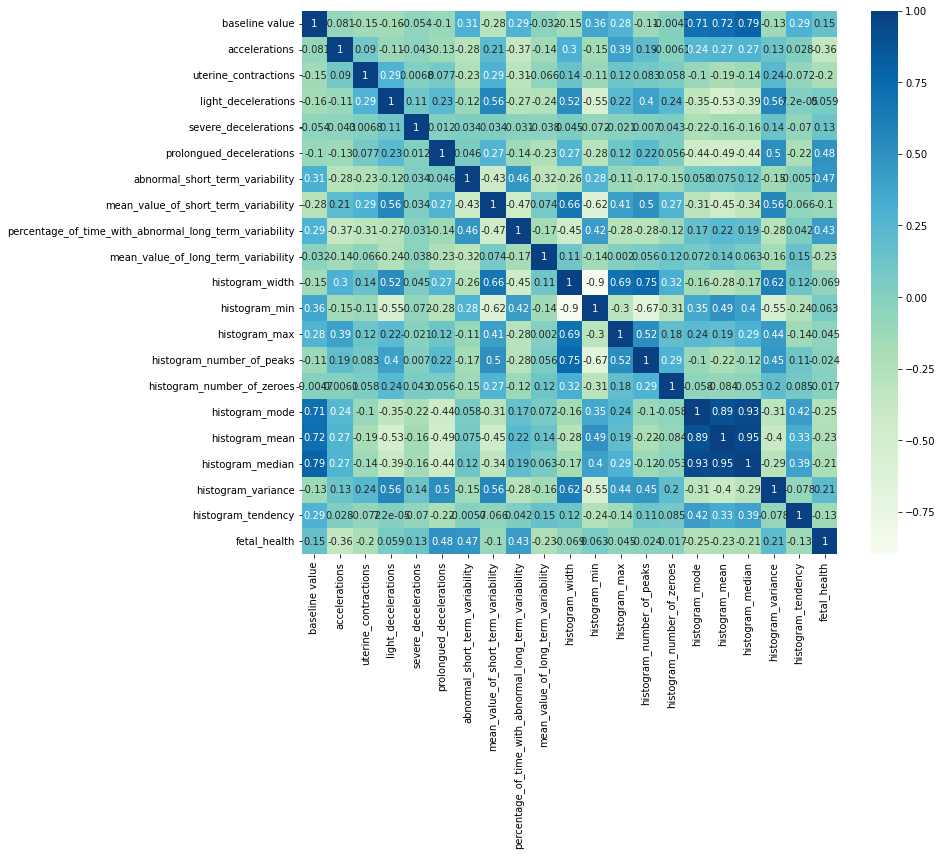

In [50]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")  

# Scaling the data

In [51]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [52]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,0.061335,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,0.061335,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,0.061335,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,0.061335,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,0.061335,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [53]:
y = data["fetal_health"]

# Test Train Split and Cross Validation methods

In [54]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

# Building Machine Learning Models:

# Logistic Regression

In [56]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.89


In [57]:
cv_method = StratifiedKFold(n_splits=3
                            )

In [58]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.90524194 0.89919355 0.87903226]
CrossValMeans: 0.894
CrossValStandard Deviation: 0.011


In [59]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [60]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [61]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [62]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=10)


In [63]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


In [64]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.899


In [65]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [66]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.133
Root Mean Square Error for Logistic Regression = 0.365
R^2(coefficient of determination) on training set = 0.91
R^2(coefficient of determination) on testing set = 0.89


# Model Performance Analysis

In [67]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.69      0.65        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.78      0.80       638
weighted avg       0.90      0.89      0.89       638



In [68]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 26  61   1]
 [  4  12  37]]


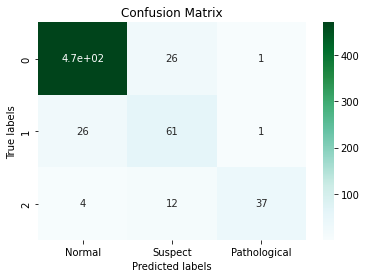

In [69]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

# K-Nearest Neighbors

In [ ]:
# # Baseline model of K-Nearest Neighbors with default parameters:

# knn = KNeighborsClassifier(n_neighbors=3)
# knn_mod = knn.fit(X_train, y_train)
# print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")
# pred_knn = knn_mod.predict(X_test)

In [ ]:
# # Cross validate K-Nearest Neighbors model
# cv_method = StratifiedKFold(n_splits=3
#                             )

# scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

# print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
# print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
# print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

In [ ]:
# params_knn = {"leaf_size": list(range(1,30)),
#               "n_neighbors": list(range(1,21)),
#               "p": [1,2]}

In [ ]:
# GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
#                                 param_grid=params_knn, 
#                                 cv=cv_method,
#                                 verbose=1, 
#                                 n_jobs=-1,
#                                 scoring="accuracy", 
#                                 return_train_score=True
#                                 )

In [ ]:
# # Fit model with train data
# GridSearchCV_knn.fit(X_train, y_train);

In [ ]:
# best_estimator_knn = GridSearchCV_knn.best_estimator_
# print(f"Best estimator for KNN model:\n{best_estimator_knn}")

In [ ]:
# best_params_knn = GridSearchCV_knn.best_params_
# print(f"Best parameter values:\n{best_params_knn}")

In [ ]:
# best_score_knn = GridSearchCV_knn.best_score_
# print(f"Best score for GNB model: {round(best_score_knn, 3)}")

In [ ]:
# # Test with new parameter for KNN model
# knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
# knn_mod = knn.fit(X_train, y_train)
# pred_knn = knn_mod.predict(X_test)

# mse_knn = mean_squared_error(y_test, pred_knn)
# rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
# score_knn_train = knn_mod.score(X_train, y_train)
# score_knn_test = knn_mod.score(X_test, y_test)

In [ ]:
# print(f"Mean Square Error for K_Nearest Neighbor  = {round(mse_knn, 3)}")
# print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
# print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
# print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

In [ ]:
# print("Classification Report")
# print(classification_report(y_test, pred_knn))

In [ ]:
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, pred_knn))

In [ ]:
# ax= plt.subplot()
# sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# # labels, title and ticks
# ax.set_xlabel("Predicted labels");
# ax.set_ylabel("True labels"); 
# ax.set_title("Confusion Matrix"); 
# ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

# Random Forest


In [ ]:
# # Baseline model of RF with default parameters:

# random_forest = RandomForestClassifier()
# random_forest_mod = random_forest.fit(X_train, y_train)
# print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

# pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.926


In [ ]:
# # Cross validate Random forest model
# scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

# print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
# print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
# print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.94959677 0.94153226 0.94153226]
CrossValMeans: 0.944
CrossValStandard Deviation: 0.004


In [ ]:
# params_RF = {"min_samples_split": [2, 6, 20],
#               "min_samples_leaf": [1, 4, 16],
#               "n_estimators" :[100,200,300,400],
#               "criterion": ["gini"]             
#               }

In [ ]:
# GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
#                                 param_grid=params_RF, 
#                                 cv=cv_method,
#                                 verbose=1, 
#                                 n_jobs=2,
#                                 scoring="accuracy", 
#                                 return_train_score=True
#                                 )

In [ ]:
# # Fit model with train data
# GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# best_estimator_RF = GridSearchCV_RF.best_estimator_
# print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(n_estimators=300)


In [ ]:
# best_params_RF = GridSearchCV_RF.best_params_
# print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# best_score_RF = GridSearchCV_RF.best_score_
# print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.943


In [ ]:
# random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
# random_forest_mod = random_forest.fit(X_train, y_train)
# pred_random_forest = random_forest_mod.predict(X_test)

# mse_random_forest = mean_squared_error(y_test, pred_random_forest)
# rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
# score_random_forest_train = random_forest_mod.score(X_train, y_train)
# score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [ ]:
# print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
# print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
# print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
# print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.1
Root Mean Square Error for Random Forest = 0.317
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.928


In [ ]:
# print("Classification Report")
# print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.80      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638



In [ ]:
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[482  11   4]
 [ 21  64   3]
 [  2   5  46]]


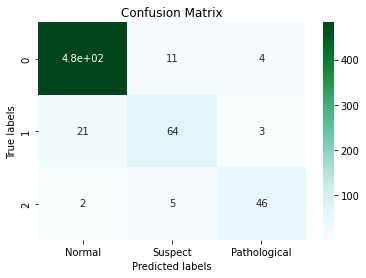

In [ ]:
# ax= plt.subplot()
# sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# # labels, title and ticks
# ax.set_xlabel("Predicted labels");
# ax.set_ylabel("True labels"); 
# ax.set_title("Confusion Matrix"); 
# ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

# Gradient Boosting classifier

In [ ]:
# # Baseline model of gradient boosting classifier with default parameters:
# gbc = GradientBoostingClassifier()
# gbc_mod = gbc.fit(X_train, y_train)
# print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

# pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


In [ ]:
# # Cross validate Gradient Boosting Classifier model
# scores_GBC = cross_val_score(gbc, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

# print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
# print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
# print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.95967742 0.93346774 0.94354839]
CrossValMeans: 0.946
CrossValStandard Deviation: 0.011


# Tuning parameters

In [ ]:
# params_GBC = {"loss": ["deviance"],
#               "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
#               "n_estimators": [250, 500],
#               "max_depth": [3, 5, 8]
#               }

In [ ]:
# GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
#                                 param_grid=params_GBC, 
#                                 cv=cv_method,
#                                 verbose=1, 
#                                 n_jobs=2,
#                                 scoring="accuracy", 
#                                 return_train_score=True
#                                 )

In [ ]:
# # Fit model with train data
# GridSearchCV_GBC.fit(X_train, y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [ ]:
# # Get the best estimator values.
# best_estimator_GBC = GridSearchCV_GBC.best_estimator_
# print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

Best estimator values for GBC model:
GradientBoostingClassifier(learning_rate=0.5, loss='deviance', n_estimators=250)


In [ ]:
# # Get the best parameter values.
# best_params_GBC = GridSearchCV_GBC.best_params_
# print(f"Best parameter values for GBC model:\n{best_params_GBC}")

Best parameter values for GBC model:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 250}


In [ ]:
# # Best score for GBC by using the best_score attribute.
# best_score_GBC = GridSearchCV_GBC.best_score_
# print(f"Best score value foe GBC model: {round(best_score_GBC, 3)}")

Best score value foe GBC model: 0.95


In [ ]:
# # Test with new parameter for GBC model
# gbc = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=1, loss="deviance", max_depth=5, max_features="log2", min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200, random_state=42)
# gbc_mod = gbc.fit(X_train, y_train)
# pred_gbc = gbc_mod.predict(X_test)

# mse_gbc = mean_squared_error(y_test, pred_gbc)
# rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
# score_gbc_train = gbc_mod.score(X_train, y_train)
# score_gbc_test = gbc_mod.score(X_test, y_test)

In [ ]:
# print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
# print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
# print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
# print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.149
Root Mean Square Error for Gradient Boosting Classifier = 0.386
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.898


In [ ]:
# print("Classification Report")
# print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       497
         2.0       0.69      0.69      0.69        88
         3.0       0.78      0.68      0.73        53

    accuracy                           0.90       638
   macro avg       0.80      0.78      0.79       638
weighted avg       0.90      0.90      0.90       638



In [ ]:
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[476  15   6]
 [ 23  61   4]
 [  4  13  36]]


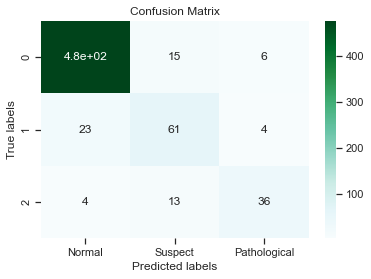

In [ ]:
# ax= plt.subplot()
# sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn");

# # labels, title and ticks
# ax.set_xlabel("Predicted labels");
# ax.set_ylabel("True labels"); 
# ax.set_title("Confusion Matrix"); 
# ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [ ]:
# # Plot learning curve
# def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
#                         n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
        
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt

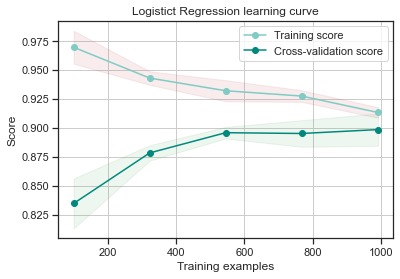

In [ ]:
# # Logistic Regression
# plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistict Regression learning curve", x = X_train, y = y_train, cv = cv_method);

In [ ]:
# plot_learning_curve(GridSearchCV_knn.best_estimator_,title = "KNN Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

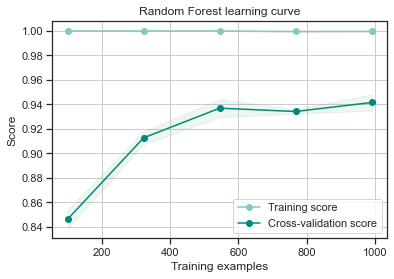

In [ ]:
# # Random forest
# plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train, y = y_train, cv = cv_method);

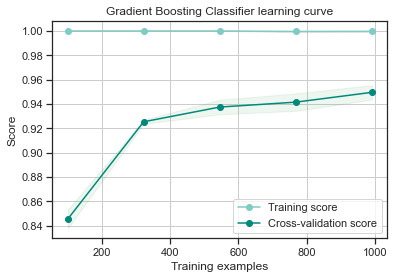

In [ ]:
# # Gradient Boosting Classifier
# plot_learning_curve(GridSearchCV_GBC.best_estimator_,title = "Gradient Boosting Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

# Model Selection

In [ ]:
# results = pd.DataFrame({
#                         "Model": ["Logistic Regression",
# #                                   "KNN",
#                                   "Random Forest",
#                                   "Gradient Boosting Classifier"],
#                         "Score": [logistic_regression_mod.score(X_train, y_train),
# #                                   knn_mod.score(X_train, y_train),
#                                   random_forest_mod.score(X_train, y_train),
#                                   gbc_mod.score(X_train, y_train),
#                                     ]
#                         })
# result_df = results.sort_values(by="Score", ascending=False)
# result_df = result_df.set_index("Score")
# result_df.head(5)

,Model
Score,
0.999328,Random Forest
0.997984,Gradient Boosting Classifier
0.906586,Logistic Regression


In [36]:
dump(logistic_regression_mod,'./../savedModels/model.joblib')

['./../savedModels/model.joblib']